In [187]:
# EDA
import pandas as pd
import numpy as np

In [188]:
data = pd.read_csv('../data/raw/training set values.csv', index_col='id', parse_dates=['date_recorded'], infer_datetime_format=True)

In [189]:
data_test = pd.read_csv('../data/raw/test set values.csv', index_col='id',parse_dates=['date_recorded'], infer_datetime_format=True)

In [190]:
labels = pd.read_csv('../data/raw/training set labels.csv', index_col='id')

In [191]:
data = data.join(labels)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             59400 non-null  float64       
 1   date_recorded          59400 non-null  datetime64[ns]
 2   funder                 55765 non-null  object        
 3   gps_height             59400 non-null  int64         
 4   installer              55745 non-null  object        
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   wpt_name               59400 non-null  object        
 8   num_private            59400 non-null  int64         
 9   basin                  59400 non-null  object        
 10  subvillage             59029 non-null  object        
 11  region                 59400 non-null  object        
 12  region_code            59400 non-null  int64         
 1

In [193]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             14850 non-null  float64       
 1   date_recorded          14850 non-null  datetime64[ns]
 2   funder                 13981 non-null  object        
 3   gps_height             14850 non-null  int64         
 4   installer              13973 non-null  object        
 5   longitude              14850 non-null  float64       
 6   latitude               14850 non-null  float64       
 7   wpt_name               14850 non-null  object        
 8   num_private            14850 non-null  int64         
 9   basin                  14850 non-null  object        
 10  subvillage             14751 non-null  object        
 11  region                 14850 non-null  object        
 12  region_code            14850 non-null  int64         
 1

### Missing data (nan's analysis)
Figure out columns with Nan's.
All are categorical. 

In [194]:
nan_columns = data.columns[data.isna().any()]

In [195]:
data[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   funder             55765 non-null  object
 1   installer          55745 non-null  object
 2   subvillage         59029 non-null  object
 3   public_meeting     56066 non-null  object
 4   scheme_management  55523 non-null  object
 5   scheme_name        31234 non-null  object
 6   permit             56344 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB


In [196]:
data[nan_columns].nunique(), "_____________", data_test[nan_columns].nunique()

(funder                1897
 installer             2145
 subvillage           19287
 public_meeting           2
 scheme_management       12
 scheme_name           2696
 permit                   2
 dtype: int64,
 '_____________',
 funder                980
 installer            1091
 subvillage           8443
 public_meeting          2
 scheme_management      11
 scheme_name          1789
 permit                  2
 dtype: int64)

In [197]:
data[nan_columns].append(data_test[nan_columns]).nunique()

funder                2140
installer             2410
subvillage           21425
public_meeting           2
scheme_management       12
scheme_name           2868
permit                   2
dtype: int64

### Categorical data
Figure out if we have labels in test set that are missing in train set.  
For this cases, I will train a LabelEncoder.
I think that this data could be "noise" instead of interesting information. 

In [198]:
def compare_columns(data_train, data_test, col1, col2):
    print('--------------')
    print(f'Train: {data_train[[col1, col2]].nunique()} \ninteraction: {(data_train[col1] + data_train[col2].astype(str)).nunique()}')
    print('______')
    print(f'test: {data_test[[col1, col2]].nunique()} \ninteraction: {(data_test[col1] + data_test[col2].astype(str)).nunique()}')
    print('______')
    print(f'Appended: {data_train[[col1, col2]].append(data_test[[col1, col2]]).nunique()}')
    print((data_train[col1] +'_'+data_train[col2].astype(str)).unique())
    print('--------------')
    

In [199]:
compare_columns(data, data_test, 'payment', 'payment_type') # equals in test-train, we could drop 1 column, select payment

--------------
Train: payment         7
payment_type    7
dtype: int64 
interaction: 7
______
test: payment         7
payment_type    7
dtype: int64 
interaction: 7
______
Appended: payment         7
payment_type    7
dtype: int64
['pay annually_annually' 'never pay_never pay' 'pay per bucket_per bucket'
 'unknown_unknown' 'pay when scheme fails_on failure' 'other_other'
 'pay monthly_monthly']
--------------


In [200]:
compare_columns(data, data_test, 'water_quality', 'quality_group') # we mantain water_quality and drop quality group maybe (?)

--------------
Train: water_quality    8
quality_group    6
dtype: int64 
interaction: 8
______
test: water_quality    8
quality_group    6
dtype: int64 
interaction: 8
______
Appended: water_quality    8
quality_group    6
dtype: int64
['soft_good' 'salty_salty' 'milky_milky' 'unknown_unknown'
 'fluoride_fluoride' 'coloured_colored' 'salty abandoned_salty'
 'fluoride abandoned_fluoride']
--------------


In [201]:
compare_columns(data, data_test, 'region', 'region_code') # we could concat this feature as "interaction"

--------------
Train: region         21
region_code    27
dtype: int64 
interaction: 32
______
test: region         21
region_code    26
dtype: int64 
interaction: 32
______
Appended: region         21
region_code    27
dtype: int64
['Iringa_11' 'Mara_20' 'Manyara_21' 'Mtwara_90' 'Kagera_18' 'Tanga_4'
 'Shinyanga_17' 'Tabora_14' 'Pwani_60' 'Ruvuma_10' 'Kilimanjaro_3'
 'Rukwa_15' 'Mwanza_19' 'Kigoma_16' 'Lindi_80' 'Dodoma_1' 'Pwani_6'
 'Arusha_2' 'Mbeya_12' 'Singida_13' 'Morogoro_5' 'Lindi_18'
 'Dar es Salaam_7' 'Mtwara_99' 'Arusha_24' 'Mtwara_9' 'Mwanza_17'
 'Lindi_8' 'Tanga_5' 'Shinyanga_14' 'Shinyanga_11' 'Pwani_40']
--------------


In [202]:
compare_columns(data, data_test, 'scheme_management', 'scheme_name') # mantain both, and splitted 

--------------
Train: scheme_management      12
scheme_name          2696
dtype: int64 
interaction: 3089
______
test: scheme_management      11
scheme_name          1789
dtype: int64 
interaction: 1961
______
Appended: scheme_management      12
scheme_name          2868
dtype: int64
['VWC_Roman' 'Other_nan' 'VWC_Nyumba ya mungu pipe scheme' ...
 'Water Board_BL Nsherehehe' 'Private operator_Magati  gravity spri'
 'VWC_Mtawanya']
--------------


In [203]:
# extraction_type - The kind of extraction the waterpoint uses
# extraction_type_group - The kind of extraction the waterpoint uses
compare_columns(data, data_test, 'extraction_type', 'extraction_type_group') # we could mantain both, but would drop extraction_type_group

--------------
Train: extraction_type          18
extraction_type_group    13
dtype: int64 
interaction: 18
______
test: extraction_type          17
extraction_type_group    13
dtype: int64 
interaction: 17
______
Appended: extraction_type          18
extraction_type_group    13
dtype: int64
['gravity_gravity' 'submersible_submersible' 'swn 80_swn 80'
 'nira/tanira_nira/tanira' 'india mark ii_india mark ii' 'other_other'
 'ksb_submersible' 'mono_mono' 'windmill_wind-powered' 'afridev_afridev'
 'other - rope pump_rope pump' 'india mark iii_india mark iii'
 'other - swn 81_other handpump' 'other - play pump_other handpump'
 'cemo_other motorpump' 'climax_other motorpump' 'walimi_other handpump'
 'other - mkulima/shinyanga_other handpump']
--------------


In [204]:
# extraction_type_group - The kind of extraction the waterpoint uses
# extraction_type_class - The kind of extraction the waterpoint uses
compare_columns(data, data_test, 'extraction_type_class', 'extraction_type_group') # we mantain 3 columns... but we could drop extraction_type_group

--------------
Train: extraction_type_class     7
extraction_type_group    13
dtype: int64 
interaction: 13
______
test: extraction_type_class     7
extraction_type_group    13
dtype: int64 
interaction: 13
______
Appended: extraction_type_class     7
extraction_type_group    13
dtype: int64
['gravity_gravity' 'submersible_submersible' 'handpump_swn 80'
 'handpump_nira/tanira' 'handpump_india mark ii' 'other_other'
 'motorpump_mono' 'wind-powered_wind-powered' 'handpump_afridev'
 'rope pump_rope pump' 'handpump_india mark iii' 'handpump_other handpump'
 'motorpump_other motorpump']
--------------


In [205]:
compare_columns(data, data_test, 'extraction_type_class', 'extraction_type') # we mantain 3 columns... but we could drop extraction_type_group

--------------
Train: extraction_type_class     7
extraction_type          18
dtype: int64 
interaction: 18
______
test: extraction_type_class     7
extraction_type          17
dtype: int64 
interaction: 17
______
Appended: extraction_type_class     7
extraction_type          18
dtype: int64
['gravity_gravity' 'submersible_submersible' 'handpump_swn 80'
 'handpump_nira/tanira' 'handpump_india mark ii' 'other_other'
 'submersible_ksb' 'motorpump_mono' 'wind-powered_windmill'
 'handpump_afridev' 'rope pump_other - rope pump'
 'handpump_india mark iii' 'handpump_other - swn 81'
 'handpump_other - play pump' 'motorpump_cemo' 'motorpump_climax'
 'handpump_walimi' 'handpump_other - mkulima/shinyanga']
--------------


In [206]:
# management - How the waterpoint is managed
# management_group - How the waterpoint is managed
compare_columns(data, data_test, 'management', 'management_group') # the same as above, we mantain but would drop management group (is not as representative as management)

--------------
Train: management          12
management_group     5
dtype: int64 
interaction: 12
______
test: management          12
management_group     5
dtype: int64 
interaction: 12
______
Appended: management          12
management_group     5
dtype: int64
['vwc_user-group' 'wug_user-group' 'other_other'
 'private operator_commercial' 'water board_user-group' 'wua_user-group'
 'company_commercial' 'water authority_commercial' 'parastatal_parastatal'
 'unknown_unknown' 'other - school_other' 'trust_commercial']
--------------


In [207]:
# quantity - The quantity of water
# quantity_group - The quantity of water
compare_columns(data, data_test, 'quantity', 'quantity_group') # drop one, I think quantity_group

--------------
Train: quantity          5
quantity_group    5
dtype: int64 
interaction: 5
______
test: quantity          5
quantity_group    5
dtype: int64 
interaction: 5
______
Appended: quantity          5
quantity_group    5
dtype: int64
['enough_enough' 'insufficient_insufficient' 'dry_dry' 'seasonal_seasonal'
 'unknown_unknown']
--------------


In [208]:
# source - The source of the water
# source_type - The source of the water
compare_columns(data, data_test, 'source', 'source_type') #drop source_type

--------------
Train: source         10
source_type     7
dtype: int64 
interaction: 10
______
test: source         10
source_type     7
dtype: int64 
interaction: 10
______
Appended: source         10
source_type     7
dtype: int64
['spring_spring' 'rainwater harvesting_rainwater harvesting' 'dam_dam'
 'machine dbh_borehole' 'other_other' 'shallow well_shallow well'
 'river_river/lake' 'hand dtw_borehole' 'lake_river/lake' 'unknown_other']
--------------


In [209]:
# waterpoint_type - The kind of waterpoint
# waterpoint_type_group - The kind of waterpoint
compare_columns(data, data_test, 'waterpoint_type', 'waterpoint_type_group') #drop waterpoint_type_group

--------------
Train: waterpoint_type          7
waterpoint_type_group    6
dtype: int64 
interaction: 7
______
test: waterpoint_type          7
waterpoint_type_group    6
dtype: int64 
interaction: 7
______
Appended: waterpoint_type          7
waterpoint_type_group    6
dtype: int64
['communal standpipe_communal standpipe'
 'communal standpipe multiple_communal standpipe' 'hand pump_hand pump'
 'other_other' 'improved spring_improved spring'
 'cattle trough_cattle trough' 'dam_dam']
--------------


### Summary

In [210]:
drop_columns = ['payment_type', 'extraction_type_group', 'management_group', 'quantity_group', 'source_type', 'waterpoint_type_group']

In [211]:
###EDA

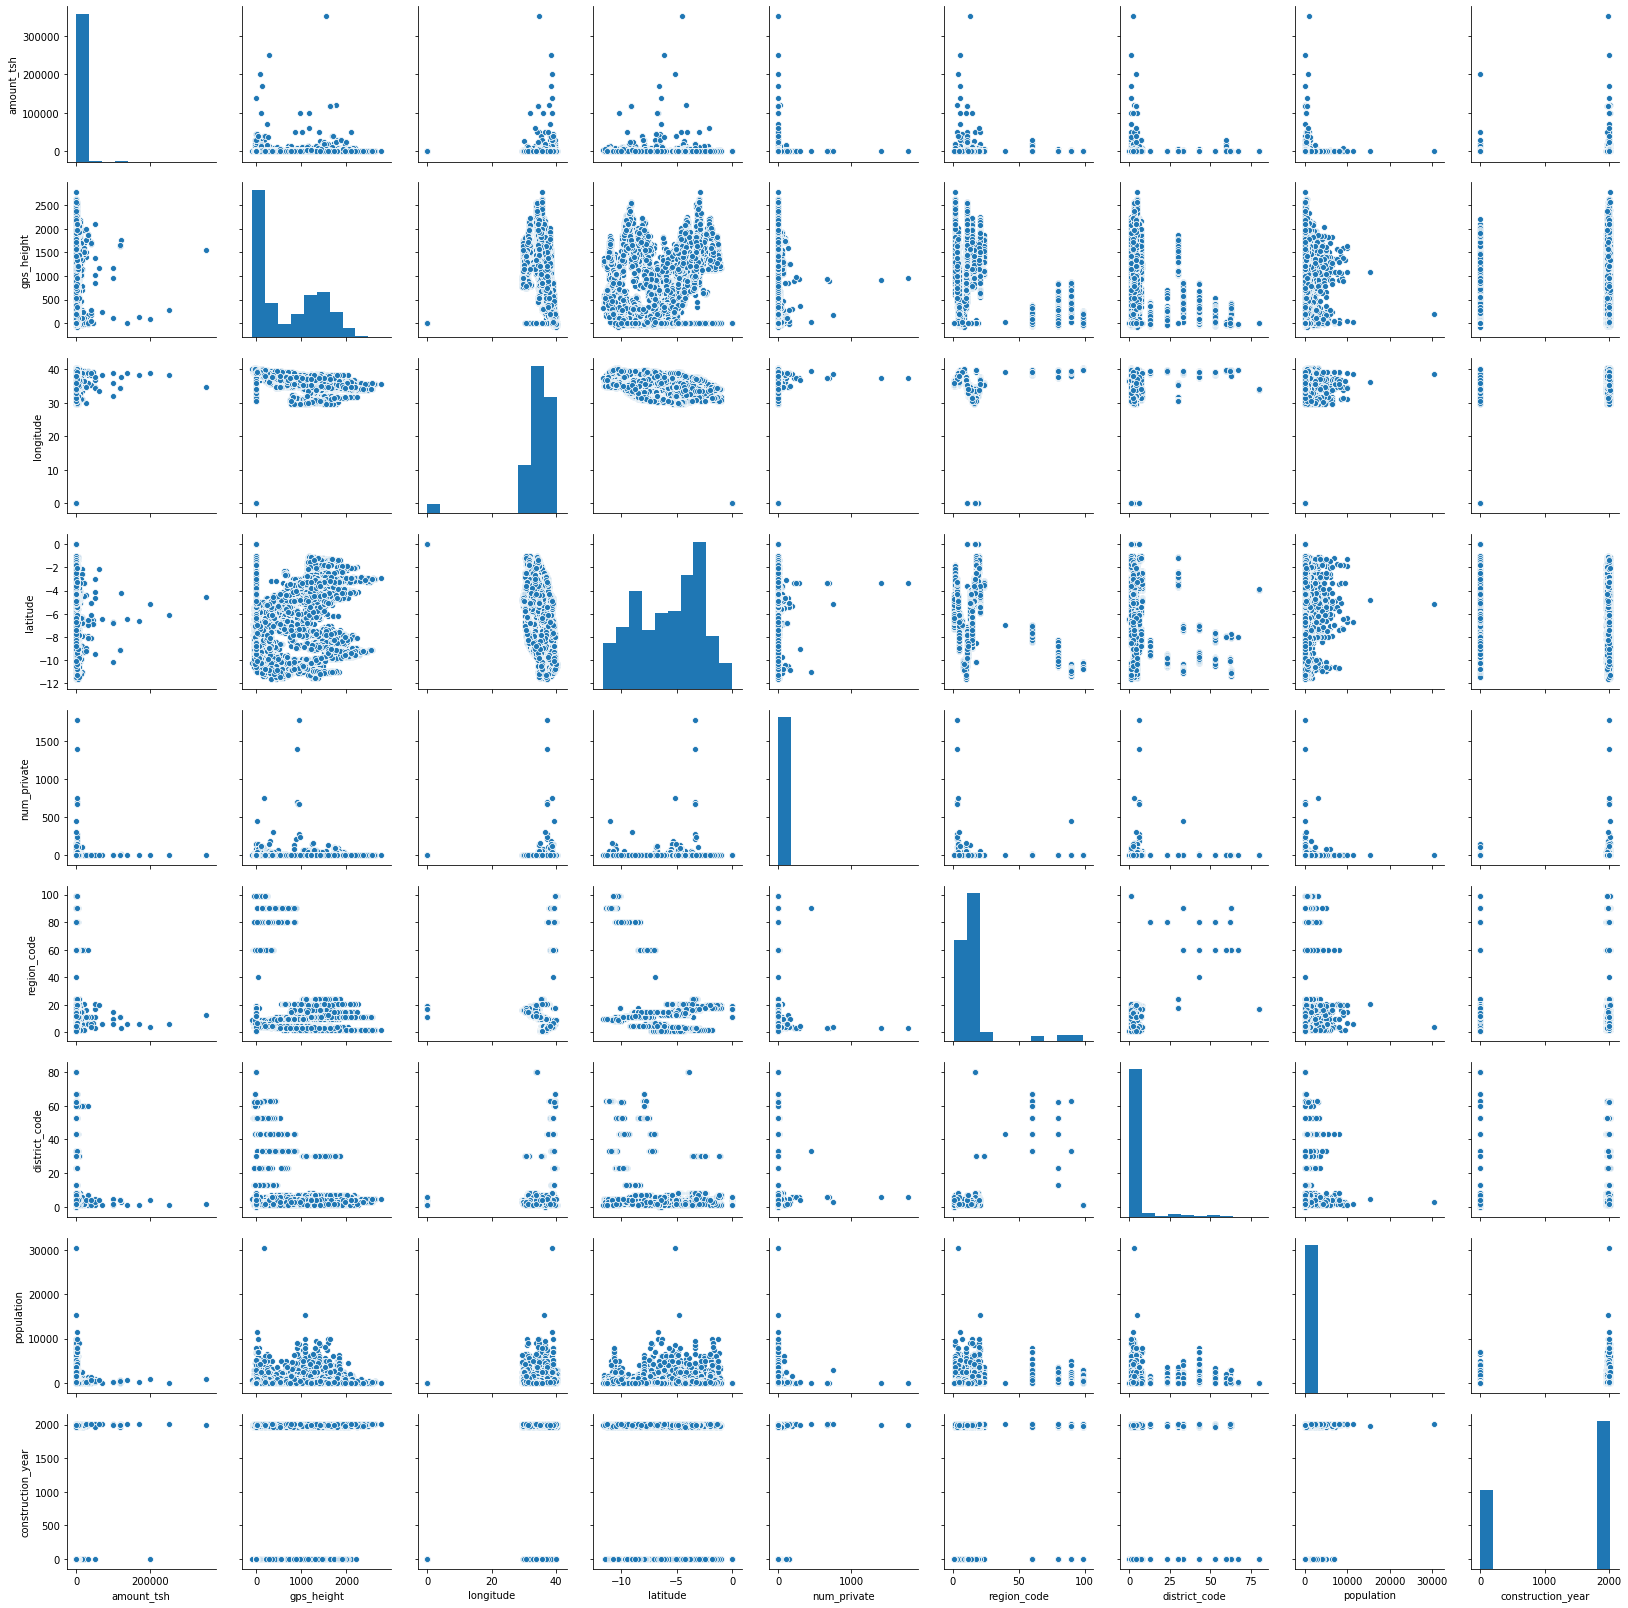

In [212]:
import seaborn as sns

sns.pairplot(data.drop(drop_columns, axis=1).fillna(np.mean))

In [213]:
data.drop(drop_columns, axis=1).describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [214]:
data.drop(drop_columns, axis=1).to_csv('../data/processed/train.csv')

In [215]:
data_test.drop(drop_columns, axis=1).to_csv('../data/processed/test.csv')

In [ ]:
### to be continue